In [3]:
import torch
import matplotlib.pyplot as plt
import numpy as np

# 1, Evaluation

In [70]:
scene = 'office4'
#exp_name = 'Pretrain_AUQCADMM_D70_S1000'
exp_name = 'Pretrain_CADMM_D70'
agent_id = 0

In [71]:

print(f'INPUT_MESH=output/Replica/{scene}/{exp_name}/agent_{agent_id}/mesh_track665.ply')
print(f'VIRT_CAM_PATH=eval_data/Replica/{scene}/virtual_cameras')
print(f'python cull_mesh.py --config configs/Replica/{scene}.yaml --input_mesh $INPUT_MESH --remove_occlusion --virtual_cameras --virt_cam_path $VIRT_CAM_PATH --gt_pose')

print('\n')

print(f'REC_MESH=output/Replica/{scene}/{exp_name}/agent_{agent_id}/mesh_track665_cull_virt_cams.ply')
print(f'GT_MESH=eval_data/Replica/{scene}/gt_mesh_cull_virt_cams.ply')
print(f'python eval_recon.py --rec_mesh $REC_MESH --gt_mesh $GT_MESH --dataset_type Replica -2d -3d')

INPUT_MESH=output/Replica/office4/Pretrain_CADMM_D70/agent_0/mesh_track665.ply
VIRT_CAM_PATH=eval_data/Replica/office4/virtual_cameras
python cull_mesh.py --config configs/Replica/office4.yaml --input_mesh $INPUT_MESH --remove_occlusion --virtual_cameras --virt_cam_path $VIRT_CAM_PATH --gt_pose


REC_MESH=output/Replica/office4/Pretrain_CADMM_D70/agent_0/mesh_track665_cull_virt_cams.ply
GT_MESH=eval_data/Replica/office4/gt_mesh_cull_virt_cams.ply
python eval_recon.py --rec_mesh $REC_MESH --gt_mesh $GT_MESH --dataset_type Replica -2d -3d


# 2, Loss Analysis

In [50]:
agent = 0


In [51]:

ckpt_path_1 = f'output/Replica/office2/Pretrain_CADMM_D80_2/agent_{agent}/checkpoint665.pt'
ckpt1 = torch.load(ckpt_path_1, map_location=torch.device('cpu'))


ckpt_path_2 = f'output/Replica/office2/Pretrain_AUQCADMM_D80_S100_2/agent_{agent}/checkpoint665.pt'
ckpt2 = torch.load(ckpt_path_2, map_location=torch.device('cpu'))


ckpt_path_3= f'output/Replica/office2/Pretrain_CADMM_D0/agent_{agent}/checkpoint665.pt'
ckpt3 = torch.load(ckpt_path_3, map_location=torch.device('cpu'))


/tmp/ipykernel_26235/1216877753.py:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  ckpt1 = torch.load(ckpt_path_1, map_location=torch.device('cpu'))
/tmp/ipykernel_26235/12

In [60]:
ckpt_path_1 = f'output/Replica/office4/Pretrain_CADMM_D70/agent_{agent}/checkpoint665.pt'
ckpt1 = torch.load(ckpt_path_1, map_location=torch.device('cpu'))


ckpt_path_2 = f'output/Replica/office4/Pretrain_AUQCADMM_D70_S1000/agent_{agent}/checkpoint665.pt'
ckpt2 = torch.load(ckpt_path_2, map_location=torch.device('cpu'))


ckpt_path_3= f'output/Replica/office2/Pretrain_CADMM_D0/agent_{agent}/checkpoint665.pt'
ckpt3 = torch.load(ckpt_path_3, map_location=torch.device('cpu'))

/tmp/ipykernel_26235/1822479822.py:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  ckpt1 = torch.load(ckpt_path_1, map_location=torch.device('cpu'))
/tmp/ipykernel_26235/18

In [61]:
total_loss_1 = np.asarray(ckpt1['total_loss'])
obj_loss_1 = np.asarray(ckpt1['obj_loss'])
consensus_loss_1 = total_loss_1 - obj_loss_1

In [62]:
total_loss_2 = np.asarray(ckpt2['total_loss'])
obj_loss_2 = np.asarray(ckpt2['obj_loss'])
consensus_loss_2 = total_loss_2 - obj_loss_2

In [63]:
total_loss_3 = np.asarray(ckpt3['total_loss'])
obj_loss_3 = np.asarray(ckpt3['obj_loss'])


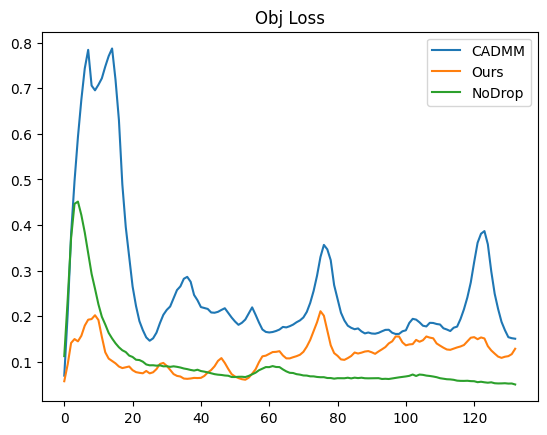

In [64]:
plt.plot(obj_loss_1, label='CADMM')
plt.plot(obj_loss_2, label='Ours')
plt.plot(obj_loss_3, label='NoDrop')
plt.title('Obj Loss')
plt.legend()
plt.show()

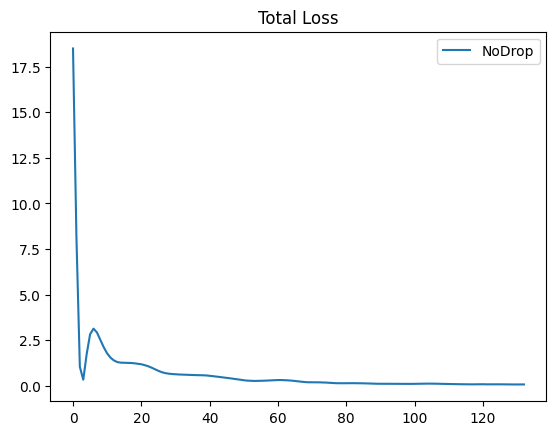

In [65]:
plt.plot(total_loss_3, label='NoDrop')
plt.title('Total Loss')
plt.legend()
plt.show()

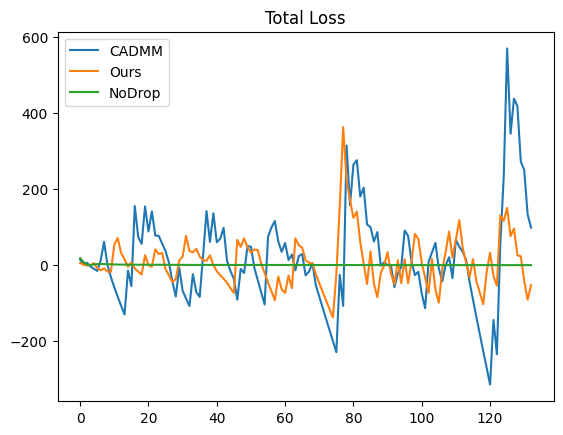

In [66]:
plt.plot(total_loss_1, label='CADMM')
plt.plot(total_loss_2, label='Ours')
plt.plot(total_loss_3, label='NoDrop')
plt.title('Total Loss')

plt.legend()
plt.show()